In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.fft import fft

In [2]:
# tickers = BBDC4.SA (stocks), indices = ^BVSP, ^GSPC
ticker = "JBSS3.SA"
ticker2 = "^BVSP"

# captura de dados  
data = yf.download(ticker, start="2013-01-01", end="2023-10-10")
data2 = yf.download(ticker2,  start="2013-01-01", end="2023-10-10")
data = data.reindex(data2.index)
data['Adj Close'] = data2['Adj Close'] / data['Adj Close']
data['Past Days'] = data['Adj Close'].shift(20)

# tratamento dos dados de retorno
preco_hoje = np.array(data['Adj Close'])
preco_passado = np.array(data['Past Days']) 
data['Past Return'] = np.log(preco_hoje / preco_passado)
data = data.dropna()
print(data.head(20))

time_series = np.array(data['Past Return'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
            Open  High   Low  Close     Adj Close    Volume     Past Days  \
Date                                                                        
2013-01-31  7.58  7.75  7.41   7.63  10803.377788   4535700  14051.578993   
2013-02-01  7.60  7.70  7.40   7.47  11143.716792   4327800  14085.121137   
2013-02-04  7.46  7.53  7.36   7.40  11104.673703   3772500  13496.000870   
2013-02-05  7.40  7.66  7.40   7.53  10888.962082   3211300  13981.284232   
2013-02-06  7.57  7.58  7.27   7.35  11062.927238   2624300  13799.556658   
2013-02-07  7.37  7.45  7.16   7.27  11074.810846   3505700  13655.525486   
2013-02-08  7.20  7.42  7.05   7.08  11396.562531   3973600  13525.267786   
2013-02-13  7.16  7.40  7.13   7.31  11020.625251   4588700  13571.881691   
2013-02-14  7.34  7.39  7.20   7.25  11049.236432   3656100  13678.879774   
2013-02-15  7.2

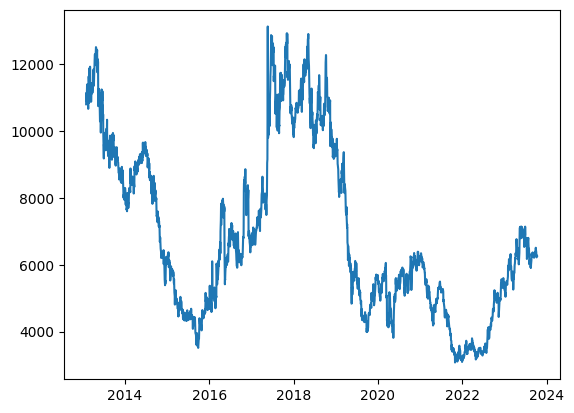

In [3]:
plt.plot(data['Adj Close'])

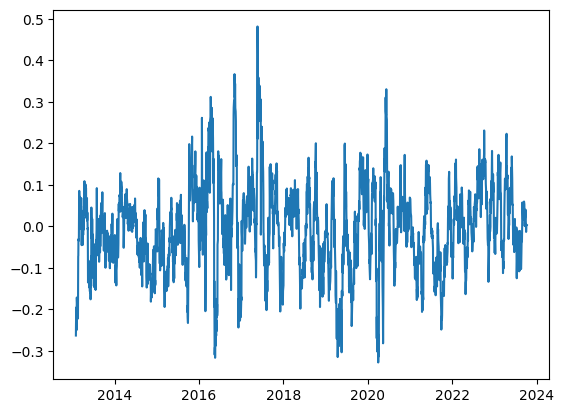

In [4]:
plt.plot(data['Past Return'])
data.to_csv('/Users/gabrielassuncao/Desktop/analise_senoide.csv')

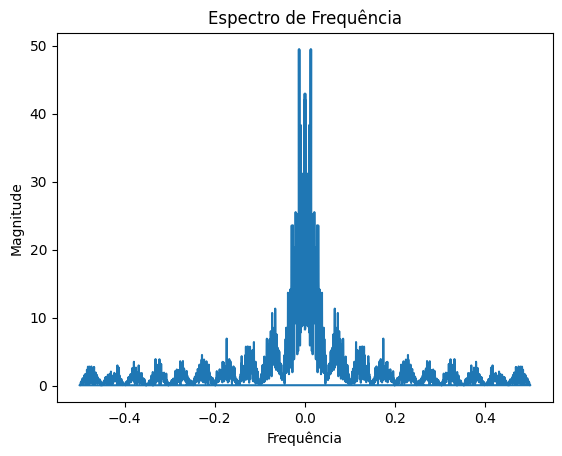

In [5]:
def decompose_time_series(time_series):
    # Calcula a FFT da série temporal
    fft_result = np.fft.fft(time_series)

    # Calcula as frequências correspondentes
    freq = np.fft.fftfreq(len(time_series))

    # Retorna o resultado da FFT e as frequências
    return fft_result, freq

# Exemplo de uso da função
fft_result, freq = decompose_time_series(time_series)
# Plotar o espectro de frequência
plt.plot(freq, np.abs(fft_result))
plt.title("Espectro de Frequência")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")
plt.show()


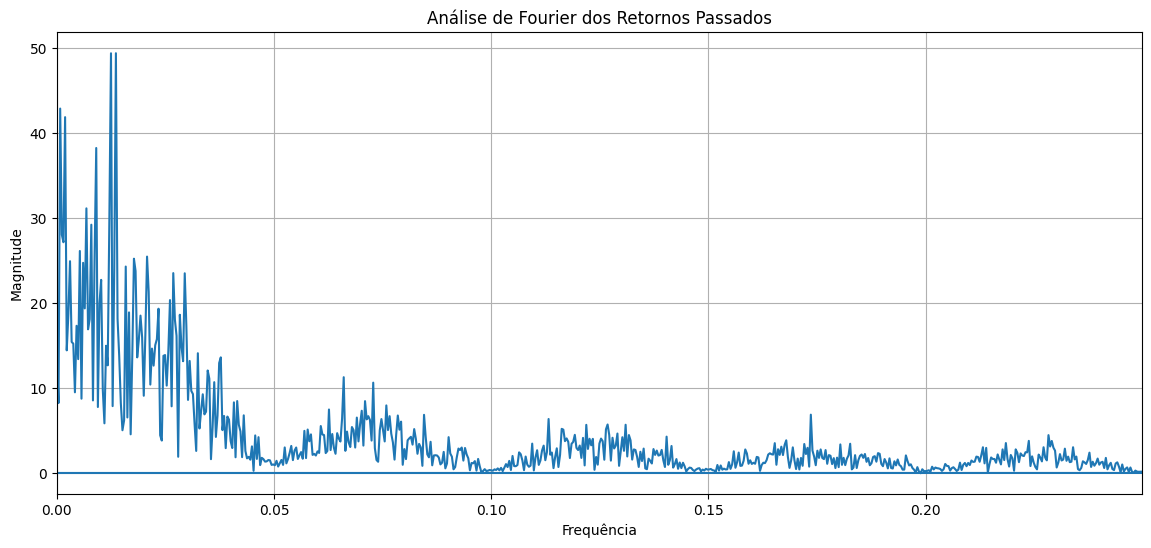

In [6]:
# Convertendo a coluna "Past Return" para um array NumPy antes de aplicar a FFT
past_return_array = data['Past Return'].to_numpy()

# Realizando a Transformada Rápida de Fourier (FFT) novamente
fft_values = fft(past_return_array)
frequencies = np.fft.fftfreq(len(fft_values))
magnitude = np.abs(fft_values)

# Preparando o gráfico
plt.figure(figsize=(14, 6))
plt.plot(frequencies, magnitude)
plt.title('Análise de Fourier dos Retornos Passados')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid(True)

# Mostrando apenas frequências positivas
plt.xlim([0, max(frequencies)/2])

plt.show()

In [7]:
# IDEIA DE duas estratégias:

# . contra tendencia: locais de baixa frenquencia pontos de retorno a alta frequencia
# . tendencia: rompendo valores de baixa frenquencia, tende a migrar para alta frenquencia
# . o que podemos inferir baseados nisso? 